In [1]:
# HIDE
import pandas as pd
import numpy as np
np.random.seed(7)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True, context="talk")
from IPython import display
%matplotlib inline

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

import keras as ke
import keras.backend as K
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.models import load_model


create_gif = False

# model reconstruction from JSON:
from keras.models import model_from_json

print(f"sklearn: {sk.__version__}")
print(f"pandas: {pd.__version__}")
print(f"kerads: {ke.__version__}")


import src.my_functions_product1 as myFC
import src.Analyzing_results as myAR
import src.Process as myPR
import matplotlib.pyplot as plt

Using TensorFlow backend.


sklearn: 0.19.1
pandas: 0.23.0
kerads: 2.1.6


In [2]:
input_option = 'not manual'
#-----------------------------------------------
feature_path = 'Feature-Datasets/adult/'
data_filename = 'adult.data'

#feature_path = 'Feature-Datasets/bank/'
#data_filename = 'bank.csv'

user_main_json_text_file = 'user1_main_task_arch_json_string_file.txt'
h5_filename = 'user1_main_task_ori_trained_model.h5'
lambda_file = 'tuning_range.txt'
p_threshold = 0.8 *100




In [3]:
Bacc_Bp_Aacc_Ap_results,lambda_to_save,result_fname,Z_test, y_test = myPR.Main_Product(input_option,feature_path, data_filename,
                                                                                       user_main_json_text_file,None,
                                                                                       h5_filename,
                                                                                       lambda_file,p_threshold)


Feature-Datasets/adult/user1_main_task_arch_json_string_file.txt
Accuracy: 85.19
tradeoff_lambda =  2.0
Accuracy: 85.39
Accuracy: 84.83
tradeoff_lambda =  4.0
Accuracy: 85.39
Accuracy: 84.42
tradeoff_lambda =  6.0
Accuracy: 85.39
Accuracy: 84.07
tradeoff_lambda =  8.0
Accuracy: 85.39
Accuracy: 83.57
tradeoff_lambda =  10.0
Accuracy: 85.39
Accuracy: 83.61
tradeoff_lambda =  12.0
Accuracy: 85.39
Accuracy: 83.37
Great, we have an updated classifier satisfying the fairness. 
Accuracy is reduced from 0.85, to 0.84:
Fairness (p-score) is improved from 29.85, to 84.86


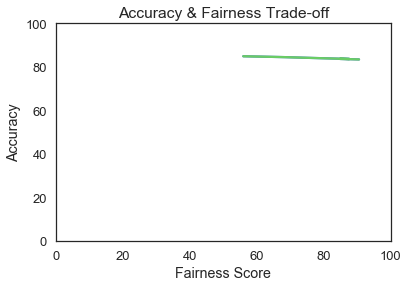

In [4]:
myAR.saving_trade_off_figures(feature_path, Bacc_Bp_Aacc_Ap_results)

Sensitive Class 0 w/o fairness FNR= 0.35, FPR= 0.11
Sensitive Class 1 w/o fairness FNR= 0.45, FPR= 0.02
Sensitive Class 0 w/ fairness FNR= 0.59, FPR= 0.04
Sensitive Class 1 w/ fairness FNR= 0.30, FPR= 0.06
-------------------------------------------------------

FNR for class 1 is reduced from 0.45 to 0.30
FPR for class 0 is reduced from 0.11 to 0.04


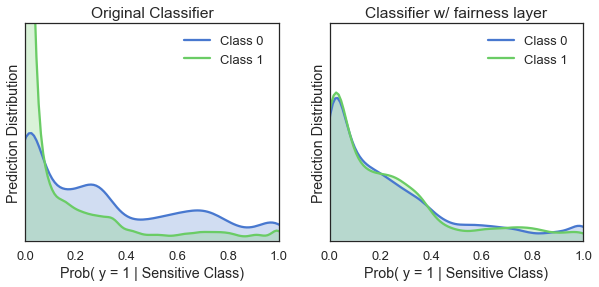

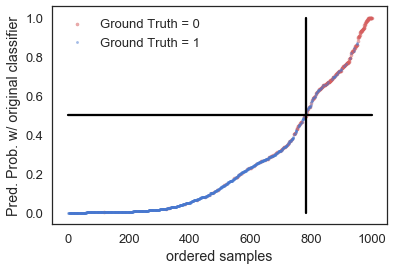

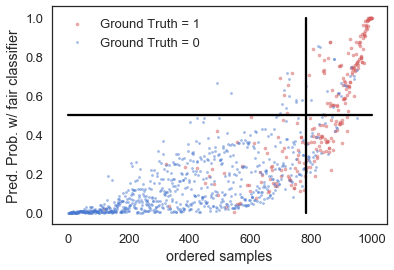

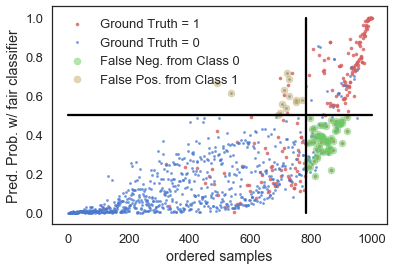

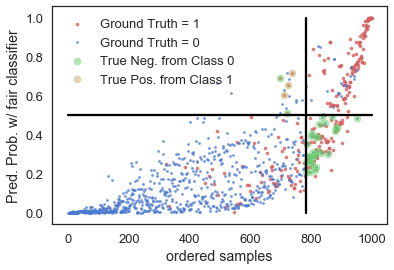

In [5]:
# a good fairness point is achieved
if lambda_to_save>0:
    result_fname_y_pred_before_after = result_fname + 'Result_y_pred_'+'L' + str(lambda_to_save) +'.txt'
    BA_y_pred = np.loadtxt(result_fname_y_pred_before_after, delimiter=',')
    
    myAR.FNR_FPR_analysis(BA_y_pred,lambda_to_save, Z_test, y_test)
    myAR.Prediction_distribution_analysis(BA_y_pred,feature_path,Z_test)
    myAR.comparing_decisions_of_classifiers(y_test,Z_test, BA_y_pred,feature_path)

## 